In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import f_oneway 
from scipy.stats import ttest_ind

In [4]:
##importamos los datos

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

names = ['sepal_length','sepal_width', 'petal_length', 'petal_width', 'class']
iris = pd.read_csv(url, names = names)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


(array([ 1.,  3.,  1.,  4.,  2.,  5.,  6., 10.,  9.,  4.,  1.,  6.,  7.,
         6.,  8.,  7.,  3.,  6.,  6., 13.,  0.,  7.,  5.,  2., 11.,  0.,
         4.,  2.,  0.,  4.,  0.,  1.,  1.,  4.,  0.,  1.]),
 array([4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5,
        5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8,
        6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9]),
 <BarContainer object of 36 artists>)

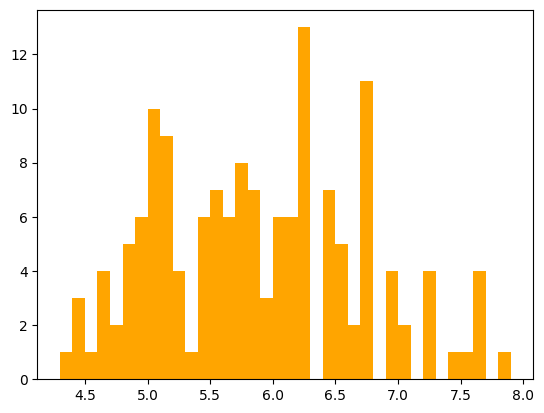

In [5]:
plt.hist(iris['sepal_length'],color= 'orange', bins= int(180/5))

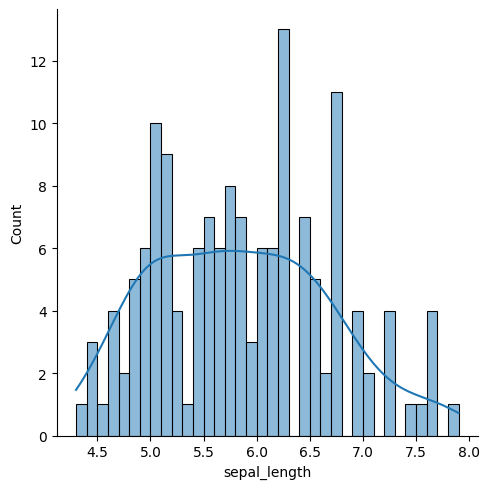

In [6]:
sns.displot(iris['sepal_length'], bins= int(180/5), kde=True)

In [7]:
##varianza
print(iris['sepal_length'].var())
##desviación standar
print(iris['sepal_length'].std())
##media
print(iris['sepal_length'].mean())


0.6856935123042507
0.828066127977863
5.843333333333334


In [8]:
##creación de una muestra media mediante el muestreo aleatorio simple
muestra = iris.sample(frac= 0.5)
muestra.head()

,sepal_length,sepal_width,petal_length,petal_width,class
87,6.3,2.3,4.4,1.3,Iris-versicolor
116,6.5,3.0,5.5,1.8,Iris-virginica
123,6.3,2.7,4.9,1.8,Iris-virginica
27,5.2,3.5,1.5,0.2,Iris-setosa
99,5.7,2.8,4.1,1.3,Iris-versicolor


In [9]:
##varianza de la muestra
print(muestra['sepal_length'].var())
##desv.std
print(muestra['sepal_length'].std())
##mdia
print(muestra['sepal_length'].mean())


0.6679171171171172
0.8172619635815173
5.878666666666667


In [10]:
##intervalo de confianza
np.random.seed(20)
var1 = np.random.randint(0,10,10)
var2 = var1 + np.random.randint(0,10,10)
print(var1)
print(var2)


[3 9 4 6 7 2 0 6 8 5]
[ 6  9 10 12  7 11  5 13 13  7]


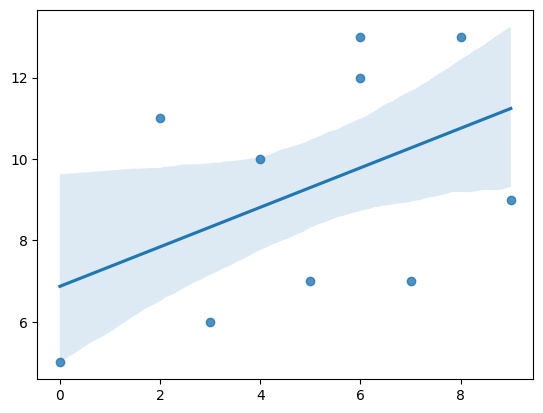

In [11]:
##visualizamos con un intervalo de confianza de 80%
grafico = sns.regplot(x=var1, y=var2, ci=80)

In [12]:
tuple = list(zip(var1,var2))
tabla = pd.DataFrame(tuple , columns=['Días_vacaciones','Dinero_generado'])
tabla

,Días_vacaciones,Dinero_generado
0,3,6
1,9,9
2,4,10
3,6,12
4,7,7
5,2,11
6,0,5
7,6,13
8,8,13
9,5,7


In [13]:
##función para intervalos de confianza
st.t.interval(confidence = 0.95, df = len(tabla)-1, loc = np.mean(tabla), scale = st.sem(tabla))

(array([5.15496491, 5.04269675]), array([9.14503509, 9.25730325]))

In [27]:
##prueba de Distribución de t de student

##entonces el error estandar es:
se_length = iris['sepal_length'].std()/ np.sqrt(10)
se_width = iris['sepal_width'].std()/ np.sqrt(10)
print(se_length)
print(se_width)
##luego el erro standar desviación 
sed = np.sqrt(se_width**2 + se_length**2)
print(sed)

##luego 
t_stat = (iris['petal_length'].mean()-iris['petal_width'].mean())/sed
print(t_stat)

##luego 
p = ttest_ind(iris['sepal_length'],iris['sepal_width'])
p

##de aquí rechazamos que las distribucuones de lingitud y ancho son distintas por que  t_tst es distinto a p

0.2618575017646526
0.13711456043966944
0.2955837511010861
8.660827905673713


TtestResult(statistic=np.float64(36.548157693982006), pvalue=np.float64(3.987838114848222e-112), df=np.float64(298.0))

In [36]:
### correlación y coficiente de pearson
print(iris['sepal_length'].corr(iris['sepal_width']))
print(st.pearsonr(iris['sepal_length'],iris['sepal_width']))

#estos valores nos indican que no existe correlación entre las variables

-0.10936924995064937
PearsonRResult(statistic=np.float64(-0.10936924995064931), pvalue=np.float64(0.18276521527136977))


In [37]:
##análisis de la varianza (ANOVA)
f_oneway(iris['sepal_length'],iris['sepal_width'])

##nuevamente las distribuciones no concuerdan, por lo que ambas variables no son similares

F_onewayResult(statistic=np.float64(1335.7678308241748), pvalue=np.float64(3.9878381148486907e-112))